# k-means clustering

### Download Iris dataset
Follow the link and download the Iris dataset:  
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/


In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

#from sklearn.cluster import KMeans

In [2]:
class _KMeans:

    def __init__(self, n_clusters=8, init='k-means++', max_iter=300):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_ = None
        self.iter = None

    def _euclidean_distance(self, X1, X2):
        # squared distance -> sum x dimensions -> transpose (clusters in row)
        return np.sqrt((X1 - X2) ** 2).sum(2).T

    def _plus_plus_init(self, X):
        self.cluster_centers_ = np.array([random.choice(X)]) # assign first random centroid
        while len(self.cluster_centers_) < self.n_clusters:
            available = [x for x in X if x not in self.cluster_centers_]
            # calculated distances (sum clusters) and probabilities (max dist -> larger prob)
            d = self._euclidean_distance(available, self.cluster_centers_[:, np.newaxis]).sum(1)
            p = d / sum(d ** 2)
            centroid = random.choices(available, p).pop() # picking the best centroid from the pool
            self.cluster_centers_ = np.append(self.cluster_centers_, [centroid], axis=0)

    def _default_init(self, X):
        self.cluster_centers_ = np.array([random.choice(X)]) # assign first random centroid
        while len(self.cluster_centers_) < self.n_clusters:
            available = [x for x in X if x not in self.cluster_centers_]
            centroid = random.choice(available)
            self.cluster_centers_ = np.append(self.cluster_centers_, [centroid], axis=0)

    def _run_means(self, X):
        self.iter = 0
        cluster_centers_old_ = None
        while not np.array_equal(cluster_centers_old_, self.cluster_centers_) and self.iter < self.max_iter:
            cluster_centers_old_ = self.cluster_centers_.copy()
            self.iter += 1

            # Step 1
            # d = [[np.sqrt(sum(np.power(i - c, 2))) for c in self.cluster_centers_] for i in X]
            d = self._euclidean_distance(X, self.cluster_centers_[:, np.newaxis])
            self.labels_ = np.argmin(d, axis=1) # indexes of min values (grouped by column)

            # Step 2
            cluster_centers_loc_ = []
            for c in range(self.n_clusters):
                xc = np.array([X[li] for li, lc in enumerate(self.labels_) if lc == c])
                # x_centers.append([sum(i) / len(i) for i in x.T])
                cluster_centers_loc_.append(xc.mean(0)) # calculate mean for each cluster x's
                
            self.cluster_centers_ = np.array(cluster_centers_loc_)

    def fit(self, X):
        X = np.array(X)

        # Step 0
        if self.init == 'k-means++':
            self._plus_plus_init(X)
        else:  # pick n random centroids
            self._default_init(X)

        # Step 1, 2
        self._run_means(X)

        return self
    
    def accuracy(self, x_class):
        df = pd.DataFrame(np.array(x_class), columns=['real']).assign(predicted=self.labels_)
        k_size = df.groupby(['real', 'predicted']).size()
        class_max = k_size.groupby(['real']).max()
        return round((class_max.sum() / len(X)), 2)

## Sample Demonstration

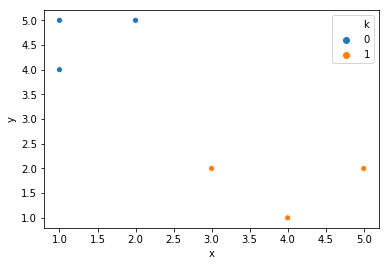

In [3]:
X = pd.DataFrame({
    'x': [1, 2, 1, 3, 5, 4],
    'y': [5, 5, 4, 2, 2, 1]
})
X['k'] = _KMeans(n_clusters=2).fit(X).labels_
sns.scatterplot(x=X['x'], y=X['y'], hue=X['k'])

## Iris Flowers

### Import

In [4]:
X = pd.read_csv('datasets/iris.data.csv')
X['k'] = _KMeans(n_clusters=3).fit(X[['sepal length', 'sepal width', 'petal length', 'petal width']]).labels_

### Clustering data

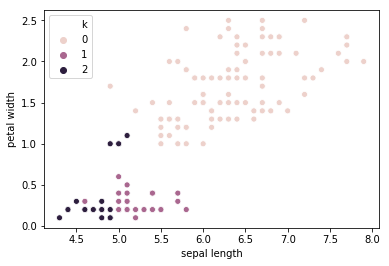

In [5]:
sns.scatterplot(x=X['sepal length'], y=X['petal width'], hue=X['k'])
#sns.pairplot(X, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue='k')

### Actual data

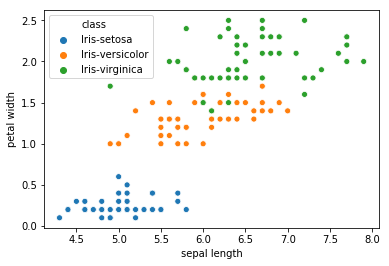

In [6]:
sns.scatterplot(x=X['sepal length'], y=X['petal width'], hue=X['class'])
# sns.pairplot(X, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue='class')

### Accuracy check for 200 iterations (k-means++)

In [7]:
models = [_KMeans(n_clusters=3, init='k-means++').fit(X[['sepal length', 'sepal width', 'petal length', 'petal width']]) for x in range(200)]

In [8]:
print('Min Iterations', np.array([x.iter for x in models]).min())
print('Max Iterations', np.array([x.iter for x in models]).max())
print('Avg Iterations', np.array([x.iter for x in models]).mean())

Min Iterations 2
Max Iterations 16
Avg Iterations 6.05


In [9]:
print('Min Accuracy', round(np.array([x.accuracy(X[['class']]) for x in models]).min(), 2))
print('Max Accuracy', round(np.array([x.accuracy(X[['class']]) for x in models]).max(), 2))
print('Avg Accuracy', round(np.array([x.accuracy(X[['class']]) for x in models]).mean(), 2))

Min Accuracy 0.81
Max Accuracy 0.89
Avg Accuracy 0.89


### Accuracy check for 200 iterations (randomly initialized centroids)

In [10]:
models = [_KMeans(n_clusters=3, init='default').fit(X[['sepal length', 'sepal width', 'petal length', 'petal width']]) for x in range(200)]

In [11]:
print('Min Iterations', np.array([x.iter for x in models]).min())
print('Max Iterations', np.array([x.iter for x in models]).max())
print('Avg Iterations', np.array([x.iter for x in models]).mean())

Min Iterations 2
Max Iterations 19
Avg Iterations 7.125


In [12]:
print('Min Accuracy', round(np.array([x.accuracy(X[['class']]) for x in models]).min(), 2))
print('Max Accuracy', round(np.array([x.accuracy(X[['class']]) for x in models]).max(), 2))
print('Avg Accuracy', round(np.array([x.accuracy(X[['class']]) for x in models]).mean(), 2))

Min Accuracy 0.81
Max Accuracy 0.89
Avg Accuracy 0.88


## Image compression

### Import

In [13]:
X = imageio.imread('datasets/image.jpg')

### Clustered image

CPU times: user 14.1 s, sys: 663 ms, total: 14.7 s
Wall time: 14.8 s


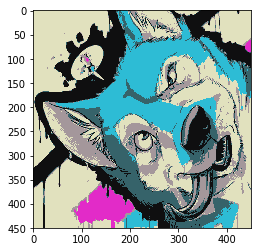

In [14]:
%%time
k = _KMeans(n_clusters=6).fit(np.reshape(X, (-1, 3)))
c = list(map((lambda y: k.cluster_centers_[y].astype(int)), k.labels_))
plt.imshow(np.reshape(c, X.shape))

### Performance check for 10 iterations (k-means++)

In [15]:
%%time
models = [_KMeans(n_clusters=3, init='k-means++').fit(np.reshape(X, (-1, 3))) for x in range(10)]

CPU times: user 1min 5s, sys: 3.26 s, total: 1min 8s
Wall time: 1min 8s


In [16]:
print('Min Iterations', np.array([x.iter for x in models]).min())
print('Max Iterations', np.array([x.iter for x in models]).max())
print('Avg Iterations', np.array([x.iter for x in models]).mean())

Min Iterations 9
Max Iterations 16
Avg Iterations 12.6


### Performance check for 10 iterations (randomly initialized centroids)

In [17]:
%%time
models = [_KMeans(n_clusters=3, init='default').fit(np.reshape(X, (-1, 3))) for x in range(10)]

CPU times: user 1min 2s, sys: 2.86 s, total: 1min 5s
Wall time: 1min 5s


In [18]:
print('Min Iterations', np.array([x.iter for x in models]).min())
print('Max Iterations', np.array([x.iter for x in models]).max())
print('Avg Iterations', np.array([x.iter for x in models]).mean())

Min Iterations 10
Max Iterations 17
Avg Iterations 13.0
